In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
#verileri oku ve type sil
df = pd.read_csv('dataset_Facebook.csv', sep=';')
df = df.drop(['Type'],axis=1)
df.drop(df.iloc[:, 6:17], inplace = True, axis = 1)
df['Paid'] = df['Paid'].fillna(0)
df.isnull().any()
df['Paid'] = df['Paid'].astype(int)
df

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Total Interactions
0,139441,2,12,4,3,0,100
1,139441,2,12,3,10,0,164
2,139441,3,12,3,3,0,80
3,139441,2,12,2,10,1,1777
4,139441,2,12,2,3,0,393
...,...,...,...,...,...,...,...
495,85093,3,1,7,2,0,84
496,81370,2,1,5,8,0,75
497,81370,1,1,5,2,0,115
498,81370,3,1,4,11,0,136


In [54]:
#x ve y leri bagımsız ve bagımlı değişken olarak ayırma
y = np.asarray(df['Total Interactions'].values.tolist()) 
df.drop(["Total Interactions"], axis = 1, inplace = True)
X = np.asarray(df.values.tolist())
print("Bağımsız özelliklerin şekli",X.shape)
print("Bağımlı özelliklerin şekli ",y.shape)

Bağımsız özelliklerin şekli (500, 6)
Bağımlı özelliklerin şekli  (500,)


In [30]:
#yeniden şekillendirme
y = y.reshape(len(y),1)

In [31]:
#bağımlı değişkenler için ölçeklendirme
y = (y - int(np.mean(y)))/np.std(y)


In [55]:
#bağımsız değişkenler için ölçeklendirme
for i in range(X.shape[1]-2):
  X[:,i] = (X[:,i] - int(np.mean(X[:,i])))/np.std(X[:,i])

In [51]:
# y =  (W1 * X1) + (W0 * X0)
X = np.concatenate((X,np.ones((500,1))), axis = 1)

In [50]:
X

array([[ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  1.,  1., ...,  1.,  1.,  1.],
       [ 0.,  2.,  1., ...,  1.,  1.,  1.],
       ...,
       [-2.,  0., -1., ...,  1.,  1.,  1.],
       [-2.,  2., -1., ...,  1.,  1.,  1.],
       [-2.,  1., -1., ...,  1.,  1.,  1.]])

In [37]:
y

array([[-2.94851140e-01],
       [-1.26364774e-01],
       [-3.47503129e-01],
       [ 4.12001816e+00],
       [ 4.76500503e-01],
       [-6.84475860e-02],
       [ 1.76384164e-01],
       [ 3.34340132e-01],
       [-5.26519893e-02],
       [-1.84281962e-01],
       [ 1.05303979e-01],
       [-2.79055543e-01],
       [-2.84320742e-01],
       [-1.57955968e-01],
       [ 1.01881599e+00],
       [-2.73790344e-01],
       [-4.15950715e-01],
       [ 1.31893233e+00],
       [-3.60666126e-01],
       [-4.47541909e-01],
       [-3.44870530e-01],
       [-5.58111086e-01],
       [-5.10724296e-01],
       [-3.05381538e-01],
       [-2.39566551e-01],
       [-2.79055543e-01],
       [ 7.42393049e-01],
       [-2.50096949e-01],
       [ 1.07936578e+00],
       [-1.00038780e-01],
       [-1.31629973e-01],
       [-4.55439707e-01],
       [-2.10607957e-02],
       [-2.29036153e-01],
       [-3.60666126e-01],
       [-3.42237930e-02],
       [-2.60627347e-01],
       [-2.94851140e-01],
       [ 1.5

In [56]:
bagimsiz_degiskenler = pd.DataFrame(X)

In [58]:
bagimsiz_degiskenler

,0,1,2,3,4,5
0,0,1,1,0,3,0
1,0,1,1,0,10,0
2,0,2,1,0,3,0
3,0,1,1,0,10,1
4,0,1,1,0,3,0
...,...,...,...,...,...,...
495,-2,2,-1,1,2,0
496,-2,1,-1,0,8,0
497,-2,0,-1,0,2,0
498,-2,2,-1,0,11,0


In [69]:
def veri_ayirma(X,y,test_size=0.2,random_state=0):
    np.random.seed(random_state)                  #tekrarlanabilir sonuç için
    indices = np.random.permutation(len(X))       #indisleri karıştırma
    data_test_size = int(X.shape[0] * test_size)  #test boyutu

    #test ve eğitim setine bölme
    train_endeks = indices[data_test_size:]
    test_endeks = indices[:data_test_size]
    X_train = X[train_endeks]
    y_train = y[train_endeks]
    X_test = X[test_endeks]
    y_test = y[test_endeks]
    return X_train, y_train, X_test, y_test

In [70]:
X_train, y_train, X_test, y_test = veri_ayirma(X,y)

In [104]:
class multipleLinearRegression():

  def __init__(self):
    
    pass

  def kayip(self,X,y,W):
   
    y_pred = sum(W * X)
    loss = ((y_pred-y)**2)/2    #Kare hatayı hesaplamak içn 1/2 yi ekledik
    return loss, y_pred

  def guncelle_agirlik(self,X,y_pred,y_true,W,alpha,index):
    
    for i in range(X.shape[1]):
      #alfa = öğrenme oranı 
      W[i] -= (alpha * (y_pred-y_true[index])*X[index][i]) 
    return W


  def sum_squared_error(self, y_true, y_pred):
        sse = np.sum((y_true - y_pred) ** 2)
        return sse

  def calculate_sse_train(self, X_train, y_train, W_trained):
      y_train_pred = np.dot(X_train, W_trained)
      sse_train = self.sum_squared_error(y_train, y_train_pred)
      return sse_train

  def calculate_sse_test(self, X_test, y_test, W_trained):
      y_test_pred = np.dot(X_test, W_trained)
      sse_test = self.sum_squared_error(y_test, y_test_pred)
      return sse_test
      
      
  def train(self, X, y, epochs=10, alpha=0.001, random_state=0):
    
    satir_sayisi = X.shape[0] 
    satir_sutunu = X.shape[1] 
    W = np.random.randn(1,satir_sutunu) / np.sqrt(satir_sayisi) #agırlıkları burada baslatır

    #zarar hesaplama ve ağırlıkları güncelleme
    zarar_dizi = []
    devir_sayisi = []
    train_indices = [i for i in range(X.shape[0])]
    for j in range(epochs):
      cost=0
      np.random.seed(random_state)
      np.random.shuffle(train_indices)
      for i in train_indices:
        loss, y_pred = self.kayip(X[i],y[i],W[0])
        cost+=loss
        W[0] = self.guncelle_agirlik(X,y_pred,y,W[0],alpha,i)
      zarar_dizi.append(cost)
      devir_sayisi.append(j)
    return W[0], zarar_dizi, devir_sayisi

  def test(self, X_test, y_test, W_trained):
    
    tahmin_test = []
    zarar_test = []
    test_indices = [i for i in range(X_test.shape[0])]
    for i in test_indices:
        loss, y_test_pred = self.kayip(X_test[i], W_trained, y_test[i])
        tahmin_test.append(y_test_pred)
        zarar_test.append(loss)
    return tahmin_test, zarar_test
    

  def predict(self, W_trained, X_sample):
    prediction = sum(W_trained * X_sample)
    return prediction

  def plotLoss(self, loss, epochs):
   
    plt.plot(epochs, loss)
    plt.xlabel('Number of Epochs')
    plt.ylabel('Loss')
    plt.title('Plot Loss')
    plt.show()

In [105]:
regressor = multipleLinearRegression()

In [106]:

W_trained, train_loss, devir_sayisi = regressor.train(X_train, y_train, epochs=200, alpha=0.0001)

In [107]:
tahmin_test, zarar_test = regressor.test(X_test, y_test, W_trained)

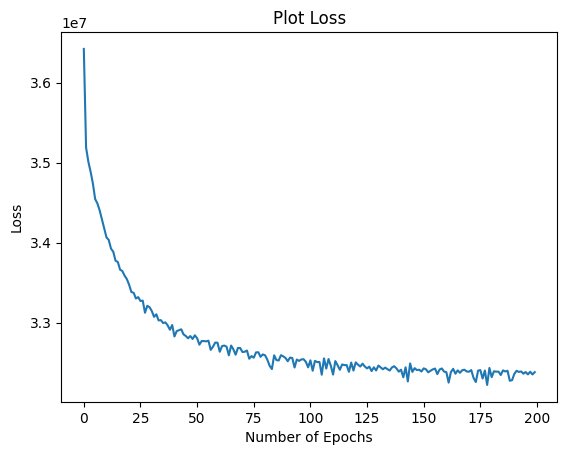

In [108]:
regressor.plotLoss(train_loss, devir_sayisi)

In [110]:


#trainde sum squares error hesaplama
sse_train = regressor.calculate_sse_train(X_train, y_train, W_trained)
print("Eğitim Verisi SSE:", sse_train)

# test üzerinde sum squres hesaplama
sse_test = regressor.calculate_sse_test(X_test, y_test, W_trained)
print("Test Verisi SSE:", sse_test)


Eğitim Verisi SSE: 64456697.53025395
Test Verisi SSE: 6772986.154621703
